In [122]:
import matplotlib.pyplot as plt

In [123]:
class Nelikulmio:
  # A, B, C, D
  _coordinates: list[list[float, float]] = [[0.0, 0.0],
                                            [0.0, 0.0],
                                            [0.0, 0.0],
                                            [0.0, 0.0]]
  
  _xcm: tuple[float, float] = (0.0, 0.0)
  _ycm: tuple[float, float] = (0.0, 0.0)

  _mass: float = 0.0

  def __init__(self,
               a: list[float, float],
               b: list[float, float],
               c: list[float, float],
               d: list[float, float],
               mass: float) -> None:
    
    self._coordinates = [a, b, c, d]
    self.calculate_cm()
    
    self._mass = mass

  def move(self, x_change: float, y_change: float) -> None:
    for i in range(len(self._coordinates)):
      x, y = self._coordinates[i]
      self._coordinates[i] = [x + x_change, y + y_change]
    
    print(self._coordinates)
    self.calculate_cm()

  def rotate(self) -> None:
    pass

  # Päivitetään kulmion tila
  def update(self, coords: list[list[float, float]]) -> None:
    self._coordinates = coords
    self.calculate_cm()

  # Lasketaan uudet massakeskeispisteet
  def calculate_cm(self) -> None:
    self._xcm = 0.0
    self._ycm = 0.0

    for c in self._coordinates:
      self._xcm += c[0]
      self._ycm += c[1]
    
    self._xcm *= 1.0 / 4
    self._ycm *= 1.0 / 4

    

    
  

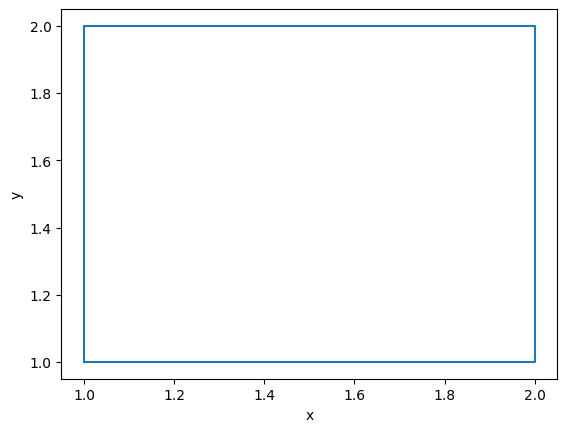

1.5 1.5


In [124]:
bingus = Nelikulmio((1.0, 1.0), (2.0, 1.0), (2.0, 2.0), (1.0, 2.0), 2.0)

xcoords = [x[0] for x in bingus._coordinates]
ycoords = [y[1] for y in bingus._coordinates]

xcoords.append(xcoords[0])
ycoords.append(ycoords[0])

plt.plot(xcoords, ycoords)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print(bingus._xcm, bingus._ycm)

[[2.0, 5.0], [3.0, 5.0], [3.0, 6.0], [2.0, 6.0]]


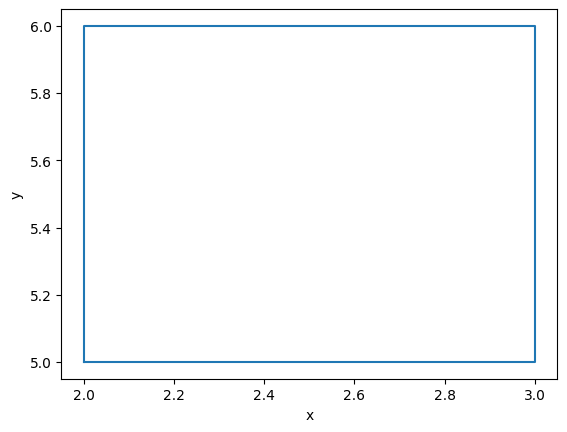

2.5 5.5


In [125]:
bingus.move(1.0, 4.0)

xcoords = [x[0] for x in bingus._coordinates]
ycoords = [y[1] for y in bingus._coordinates]

xcoords.append(xcoords[0])
ycoords.append(ycoords[0])

plt.plot(xcoords, ycoords)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print(bingus._xcm, bingus._ycm)